# Mini_Project_ Stroke_Data_Segmentation

In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

### Resetting id as index

In [4]:
df.set_index('id',inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Missing values

In [5]:
df.isnull().mean()*100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [6]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [7]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Outliers Detections

In [9]:
Out_colms = ['age','avg_glucose_level','bmi']

In [10]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
df['Anomaly_score'] = model_ee.fit_predict(df[Out_colms])
df = df[df['Anomaly_score']==1]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Anomaly_score
id,,,,,,,,,,,,
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1


In [11]:
del df['Anomaly_score']

In [12]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [13]:
df.shape

(4854, 11)

### Standerdizations

In [14]:
clust_cols = ['age','avg_glucose_level','bmi']
clust_df = df[clust_cols]
clust_df.head()

,age,avg_glucose_level,bmi
id,,,
51676,61.0,202.21,28.1
31112,80.0,105.92,32.5
60182,49.0,171.23,34.4
1665,79.0,174.12,24.0
56669,81.0,186.21,29.0


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clust_df_std = sc.fit_transform(clust_df)
clust_df_std

array([[ 0.83395811,  2.83926182, -0.05369496],
       [ 1.67783492,  0.17068508,  0.55125066],
       [ 0.30098328,  1.98068349,  0.81247718],
       ...,
       [-0.32082069, -0.46479592,  0.29002415],
       [ 0.38981242,  1.84377655, -0.39741406],
       [ 0.07891043, -0.40133096, -0.31492147]])

In [16]:
clust_df_std = pd.DataFrame(clust_df_std,columns=clust_df.columns,index=clust_df.index)
clust_df_std

,age,avg_glucose_level,bmi
id,,,
51676,0.833958,2.839262,-0.053695
31112,1.677835,0.170685,0.551251
60182,0.300983,1.980683,0.812477
1665,1.633420,2.060777,-0.617394
56669,1.722249,2.395839,0.070044
...,...,...,...
18234,1.677835,-0.443733,-0.053695
44873,1.722249,0.705010,1.582408
19723,-0.320821,-0.464796,0.290024


### Kmeans Clustring 

#### Indetification of K values

In [17]:
from sklearn.metrics import silhouette_score
WCSS = []
sil_score =[]
for k in range(1,20):
    kmeans = KMeans(n_clusters = k , init='k-means++')
    kmeans.fit(clust_df_std)
    WCSS.append(kmeans.inertia_)
    if pd.Series(kmeans.labels_).nunique() <2:
        sil_score.append(-1)
    else:
        sil_score.append(silhouette_score(clust_df[clust_cols],kmeans.labels_))

In [18]:
# converting the results into a dataframe and plotting them
df_scores = pd.DataFrame({'k':range(1,20),'WCSS':WCSS,'Silhouette_score':sil_score})
df_scores.sort_values(by='Silhouette_score',ascending=False)

,k,WCSS,Silhouette_score
2,3,6861.477723,0.330392
3,4,5139.703394,0.222233
5,6,3974.516232,0.217983
4,5,4373.193291,0.212120
1,2,9932.368749,0.208150
6,7,3600.545408,0.165656
8,9,3076.946025,0.162294
9,10,2864.970941,0.154181
7,8,3334.484319,0.150656
10,11,2682.765039,0.123544


### Elboow mothods

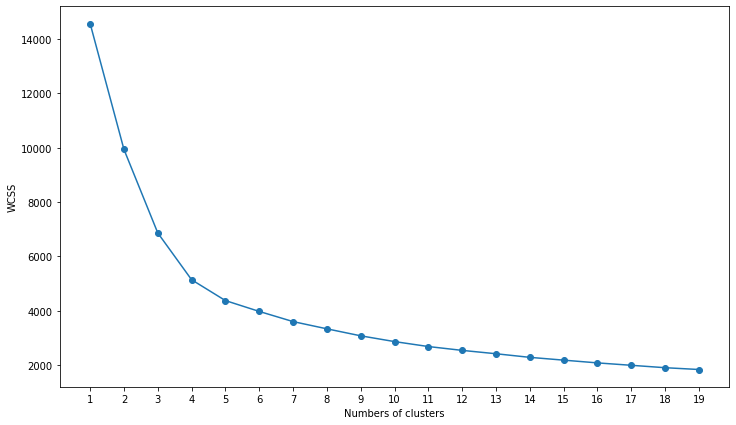

In [19]:
plt.figure(figsize=(12,7))
plt.plot(df_scores['k'],df_scores['WCSS'],marker='o')
plt.xticks(range(1,20))
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.show()

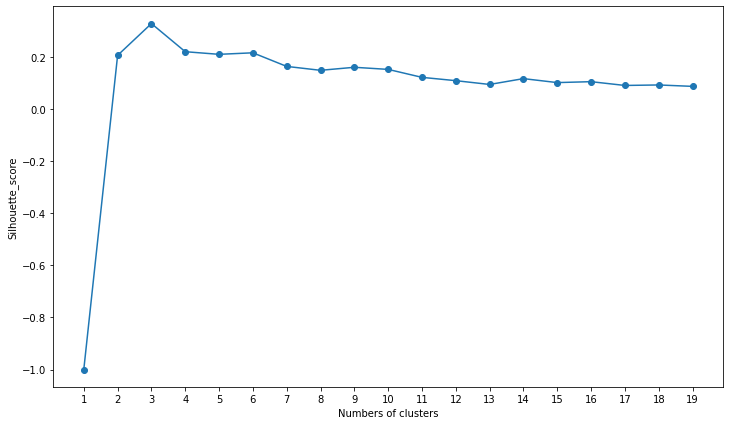

In [20]:
plt.figure(figsize=(12,7))
plt.plot(df_scores['k'],df_scores['Silhouette_score'],marker='o')
plt.xticks(range(1,20))
plt.xlabel('Numbers of clusters')
plt.ylabel('Silhouette_score')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = df_scores[df_scores['Silhouette_score']==df_scores['Silhouette_score'].max()]['k'].values[0],
                init='k-means++',random_state=42)
kmeans.fit(clust_df_std)
KMEANS_pred = kmeans.predict(clust_df_std)
KMEANS_pred

array([1, 0, 1, ..., 0, 1, 0])

In [22]:
clust_df['KMEANS_pred']=KMEANS_pred
df['KMEANS_pred']=KMEANS_pred
clust_df

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\3650310366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df['KMEANS_pred']=KMEANS_pred


,age,avg_glucose_level,bmi,KMEANS_pred
id,,,,
51676,61.0,202.21,28.1,1
31112,80.0,105.92,32.5,0
60182,49.0,171.23,34.4,1
1665,79.0,174.12,24.0,1
56669,81.0,186.21,29.0,1
...,...,...,...,...
18234,80.0,83.75,28.1,0
44873,81.0,125.20,40.0,0
19723,35.0,82.99,30.6,0


In [23]:
metric_df = pd.DataFrame(columns=['Methods','Parameters','Silhouette_score'])
metric_df.loc[len(metric_df)]=('KMEANS',{ ' K ' :df_scores[df_scores['Silhouette_score']==df_scores['Silhouette_score'].max()]['k'].values[0] },
                df_scores['Silhouette_score'].max())
metric_df

,Methods,Parameters,Silhouette_score
0,KMEANS,{' K ': 3},0.330392


### DBSCAN Clustering

### Optimum values of parameters

In [24]:
eps =[]
min_samp=[]
silhouette_sc=[]
for e in [x/10 for x in range(1,10)]:
    for ms in range(2,30):
        print(e,ms)
        db = DBSCAN(eps=e,min_samples=ms,n_jobs=-1)
        db.fit(clust_df_std)
        eps.append(e)
        min_samp.append(ms)
        if pd.Series(db.labels_).nunique()<2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(silhouette_score(clust_df[clust_cols],db.labels_))
        


0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.1 10
0.1 11
0.1 12
0.1 13
0.1 14
0.1 15
0.1 16
0.1 17
0.1 18
0.1 19
0.1 20
0.1 21
0.1 22
0.1 23
0.1 24
0.1 25
0.1 26
0.1 27
0.1 28
0.1 29
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.2 10
0.2 11
0.2 12
0.2 13
0.2 14
0.2 15
0.2 16
0.2 17
0.2 18
0.2 19
0.2 20
0.2 21
0.2 22
0.2 23
0.2 24
0.2 25
0.2 26
0.2 27
0.2 28
0.2 29
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9
0.3 10
0.3 11
0.3 12
0.3 13
0.3 14
0.3 15
0.3 16
0.3 17
0.3 18
0.3 19
0.3 20
0.3 21
0.3 22
0.3 23
0.3 24
0.3 25
0.3 26
0.3 27
0.3 28
0.3 29
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.4 10
0.4 11
0.4 12
0.4 13
0.4 14
0.4 15
0.4 16
0.4 17
0.4 18
0.4 19
0.4 20
0.4 21
0.4 22
0.4 23
0.4 24
0.4 25
0.4 26
0.4 27
0.4 28
0.4 29
0.5 2
0.5 3
0.5 4
0.5 5
0.5 6
0.5 7
0.5 8
0.5 9
0.5 10
0.5 11
0.5 12
0.5 13
0.5 14
0.5 15
0.5 16
0.5 17
0.5 18
0.5 19
0.5 20
0.5 21
0.5 22
0.5 23
0.5 24
0.5 25
0.5 26
0.5 27
0.5 28
0.5 29
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.6 10
0.6 1

In [25]:
df_scores = pd.DataFrame(list(zip(eps,min_samp,silhouette_sc)),columns=['eps','min_samples','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,eps,min_samples,score
137,0.5,27,0.441471
138,0.5,28,0.441168
139,0.5,29,0.440207
99,0.4,17,0.418034
101,0.4,19,0.414780
...,...,...,...
227,0.9,5,-1.000000
228,0.9,6,-1.000000
12,0.1,14,-1.000000
11,0.1,13,-1.000000


In [26]:
db = DBSCAN(eps=df_scores[df_scores['score']==df_scores['score'].max()]['eps'].values[0],
           min_samples=df_scores[df_scores['score']==df_scores['score'].max()]['min_samples'].values[0],n_jobs=-1)
db.fit(clust_df_std)
dbs_pred=db.labels_
dbs_pred

array([ 0,  1, -1, ...,  1,  0,  1], dtype=int64)

In [27]:
clust_df['DBSCAN_pred']=dbs_pred
df['DBSCAN_pred']=dbs_pred
clust_df

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\3505272051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df['DBSCAN_pred']=dbs_pred


,age,avg_glucose_level,bmi,KMEANS_pred,DBSCAN_pred
id,,,,,
51676,61.0,202.21,28.1,1,0
31112,80.0,105.92,32.5,0,1
60182,49.0,171.23,34.4,1,-1
1665,79.0,174.12,24.0,1,-1
56669,81.0,186.21,29.0,1,0
...,...,...,...,...,...
18234,80.0,83.75,28.1,0,1
44873,81.0,125.20,40.0,0,-1
19723,35.0,82.99,30.6,0,1


In [28]:
metric_df.loc[len(metric_df)]=('DBSCAN',{'eps':df_scores[df_scores['score']==df_scores['score'].max()]['eps'].values[0],
                                        'min_samples':df_scores[df_scores['score']==df_scores['score'].max()]['min_samples'].values[0]},
                                        df_scores['score'].max())
metric_df

,Methods,Parameters,Silhouette_score
0,KMEANS,{' K ': 3},0.330392
1,DBSCAN,"{'eps': 0.5, 'min_samples': 27}",0.441471


### Agglomerative Clustering

#### Identifing the Optimum values of parameters

In [29]:
from sklearn.cluster import AgglomerativeClustering
n_clust = []
linkage = []
silhouette_sc = []
for i in range(2,11):
    for l in ['ward', 'complete', 'average', 'single']:
        print(i,l)
        agm = AgglomerativeClustering(n_clusters=i,linkage=l, 
                             compute_full_tree=True)
        agm.fit(clust_df_std)
        n_clust.append(i)
        linkage.append(l)
        if pd.Series(agm.labels_).nunique() <2:
            silhouette_sc.append(-1)
        else:
            silhouette_sc.append(silhouette_score(clust_df[clust_cols],agm.labels_))

2 ward
2 complete
2 average
2 single
3 ward
3 complete
3 average
3 single
4 ward
4 complete
4 average
4 single
5 ward
5 complete
5 average
5 single
6 ward
6 complete
6 average
6 single
7 ward
7 complete
7 average
7 single
8 ward
8 complete
8 average
8 single
9 ward
9 complete
9 average
9 single
10 ward
10 complete
10 average
10 single


In [30]:
df_scores = pd.DataFrame(list(zip(n_clust,linkage,silhouette_sc)),columns=['k','linkage','score'])
df_scores.sort_values(by='score',ascending=False,inplace=True)
df_scores

,k,linkage,score
2,2,average,0.585323
3,2,single,0.349295
4,3,ward,0.288051
20,7,ward,0.179055
8,4,ward,0.176004
12,5,ward,0.172266
9,4,complete,0.170315
16,6,ward,0.166330
0,2,ward,0.160009
17,6,complete,0.120742


In [31]:
agm = AgglomerativeClustering(n_clusters = df_scores[df_scores['score']==df_scores['score'].max()]['k'].values[0],
                             linkage= df_scores[df_scores['score']==df_scores['score'].max()]['linkage'].values[0])
agm_pred = agm.fit_predict(clust_df_std)

In [32]:
clust_df['AGM_pred'] = agm_pred
df['AGM_pred']=agm_pred
clust_df

C:\Users\hp\AppData\Local\Temp\ipykernel_11656\1474773439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust_df['AGM_pred'] = agm_pred


,age,avg_glucose_level,bmi,KMEANS_pred,DBSCAN_pred,AGM_pred
id,,,,,,
51676,61.0,202.21,28.1,1,0,1
31112,80.0,105.92,32.5,0,1,0
60182,49.0,171.23,34.4,1,-1,1
1665,79.0,174.12,24.0,1,-1,1
56669,81.0,186.21,29.0,1,0,1
...,...,...,...,...,...,...
18234,80.0,83.75,28.1,0,1,0
44873,81.0,125.20,40.0,0,-1,0
19723,35.0,82.99,30.6,0,1,0


In [33]:
metric_df.loc[len(metric_df)]=('AGM',{'k':df_scores[df_scores['score']==df_scores['score'].max()]['k'].values[0],
                                    'linkage':df_scores[df_scores['score']==df_scores['score'].max()]['linkage'].values[0]},
                             df_scores['score'].max())
metric_df                  

,Methods,Parameters,Silhouette_score
0,KMEANS,{' K ': 3},0.330392
1,DBSCAN,"{'eps': 0.5, 'min_samples': 27}",0.441471
2,AGM,"{'k': 2, 'linkage': 'average'}",0.585323


In [34]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,KMEANS_pred,DBSCAN_pred,AGM_pred
id,,,,,,,,,,,,,,
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,1,0,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,1,0
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,-1,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,-1,1
56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0,0,1,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,-1,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,1,0


In [37]:
df.to_csv("D:\Mini Project Ekeeda.csv")